# Analysis ARX dataset

Authors:
- Joana Simões, n.º 2019217013
- Tomás Ferreira, n.º 2019224786

Este notebook contém a análise feita com o dataset anonimizado pelo ARX. Para comparar a análise com a análise dos dados originais, recomenda-se que se visualize este notebook lado a lado com o notebook "analysis_original.ipynb".

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [27]:
data_path = os.path.join('dataset', 'infringement_dataset_arx.csv')

In [52]:
# load dataset
data = pd.read_csv(data_path, low_memory=False)

In [29]:
# remove rows with missing values
data = data.dropna()

## Analyse past columns

In [30]:
past_selected_columns = ['infringed']
for column in data.columns:
    if column.startswith('past'):
        past_selected_columns.append(column)

In [31]:
past_data = data[past_selected_columns]

### Correlation between past credit application and infringement

In [32]:
past_correlation_all = past_data.corr()

Text(0.5, 1.0, 'Correlation between past credit applications info and infringements')

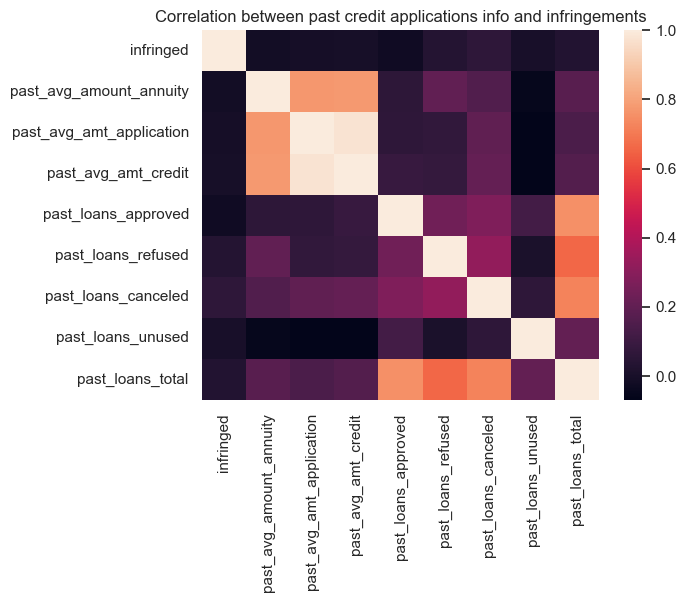

In [33]:
plt.figure()
sns.heatmap(past_correlation_all,
    xticklabels=past_correlation_all.columns,
    yticklabels=past_correlation_all.columns,
)
plt.title('Correlation between past credit applications info and infringements')

Como se pode observar, e à semelhança da análise feita com o dataset original, a correlação entre antigos empréstimos e o facto de existir um infringement ou não, é praticamente nula. No entanto, de toda a informação, é possível oobervar que quantos mais empréstimos foram cancelados no passado, maior é a probabilidade de haver um infringement agora.

In [34]:
past_amt = []
for col in past_selected_columns:
    if col.startswith('past_avg'):
        past_amt.append(col)

In [35]:
past_amt_mean_infringed = pd.DataFrame(data[data.infringed == True][past_amt].mean())
past_amt_mean_not_infringed = pd.DataFrame(data[data.infringed == False][past_amt].mean())

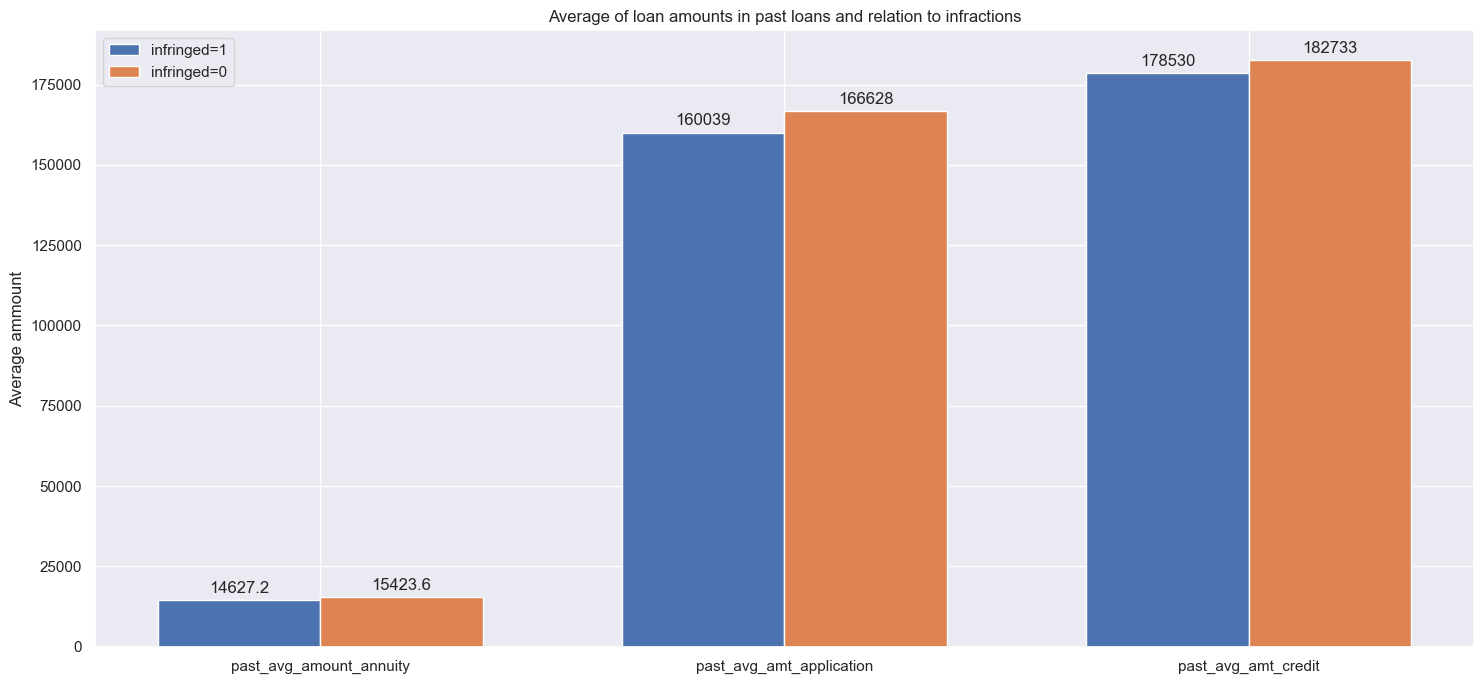

In [36]:
x = np.arange(len(past_amt_mean_infringed.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, past_amt_mean_infringed[0], width, label='infringed=1')
rects2 = ax.bar(x + width/2, past_amt_mean_not_infringed[0], width, label='infringed=0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average ammount')
ax.set_title('Average of loan amounts in past loans and relation to infractions')
ax.set_xticks(x, labels=list(past_amt_mean_infringed.index))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

Como se pode observar, as distribuições são idênticas às do dataset original, variando muito pouco os dados para a grandeza deles.

In [37]:
past_loans = []
for col in past_selected_columns:
    if col.startswith('past_loans'):
        past_loans.append(col)

In [38]:
past_loans_mean_infringed = pd.DataFrame(data[data.infringed == True][past_loans].mean())
past_loans_mean_not_infringed = pd.DataFrame(data[data.infringed == False][past_loans].mean())

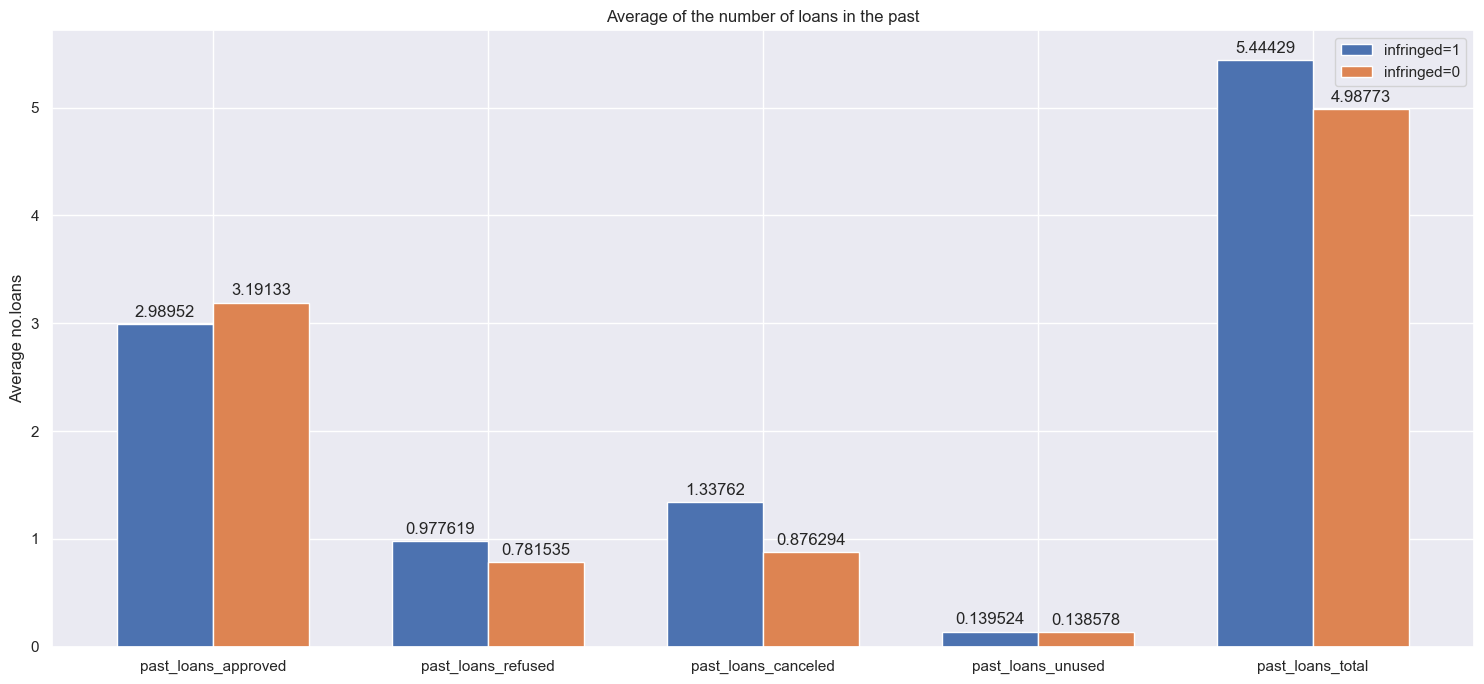

In [39]:
x = np.arange(len(past_loans_mean_infringed.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, past_loans_mean_infringed[0], width, label='infringed=1')
rects2 = ax.bar(x + width/2, past_loans_mean_not_infringed[0], width, label='infringed=0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average no.loans')
ax.set_title('Average of the number of loans in the past')
ax.set_xticks(x, labels=list(past_loans_mean_infringed.index))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

Mais uma vez, os dados são das mesmas ordens de grandeza que os dados do dataset original, sendo a distribuição identica.

In [40]:
diffs = past_loans_mean_not_infringed - past_loans_mean_infringed

In [41]:
diffs.index[np.argmax(np.abs(diffs[0]))]

'past_loans_canceled'

## Analyse personas

Text(0.5, 1.0, 'Histogram with the distribution of ages of people')

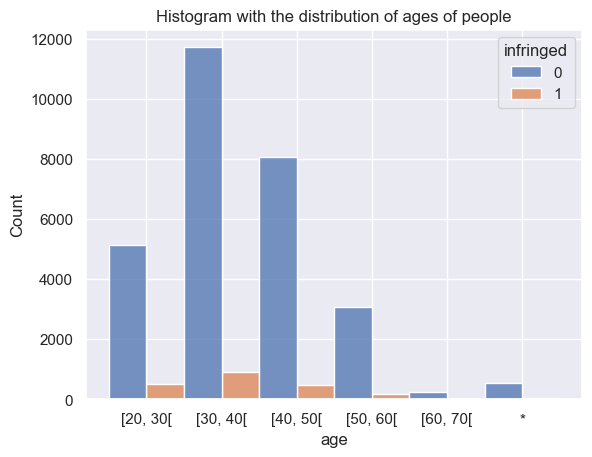

In [42]:
plt.figure()
sns.set()
sns.histplot(data=data, x='age', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of ages of people')

Como se pode observar pela distribuição das idades, a maior parte das pessoas que pediram empréstimos têm entre 20 e 50 anos, sendo o máximo, quando as pessoas têm entre 30 a 40 anos. É ainda possivel observar que pessoas com isdades entre os 40 e os 50 anos, pedem mais empréstimos que pessoas entre os 20 e os 30 anos, no entanto cometem menos infrações que as pessoas mais novas. Esta distribuição é identica à do dataset orifinal, variando apenas na nova classe "*" que foi adicionada

Text(0.5, 1.0, 'Histogram with the distribution of annual income of people')

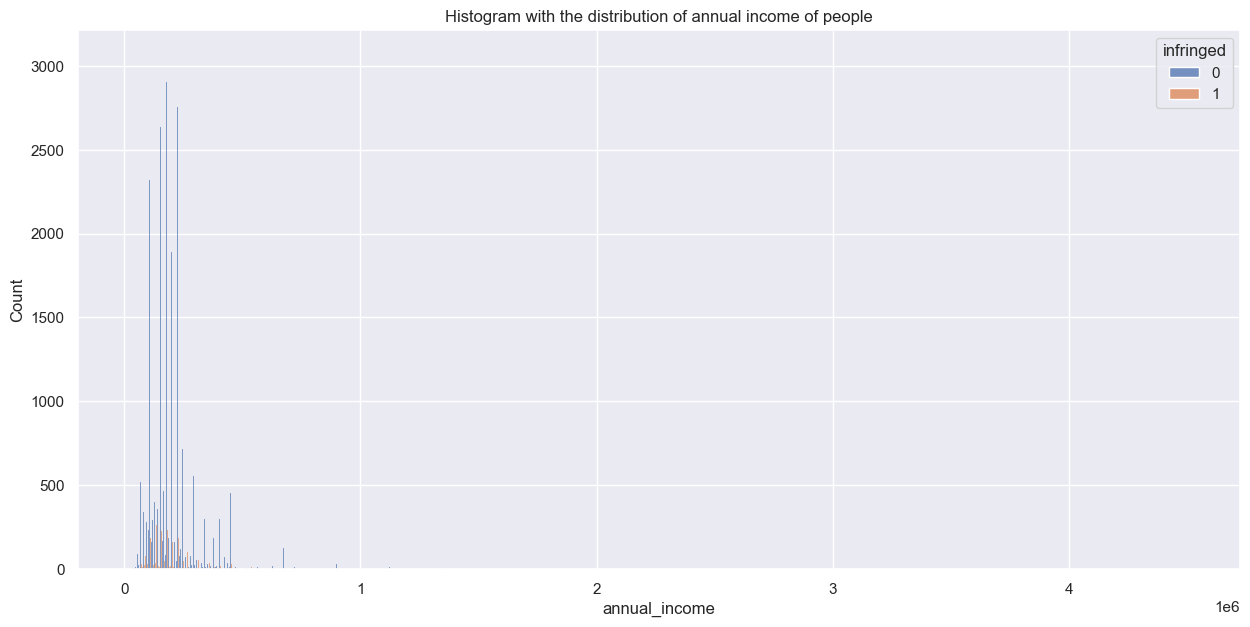

In [48]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='annual_income', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of annual income of people')

Text(0.5, 1.0, 'Histogram with the distribution of credit annuity of people')

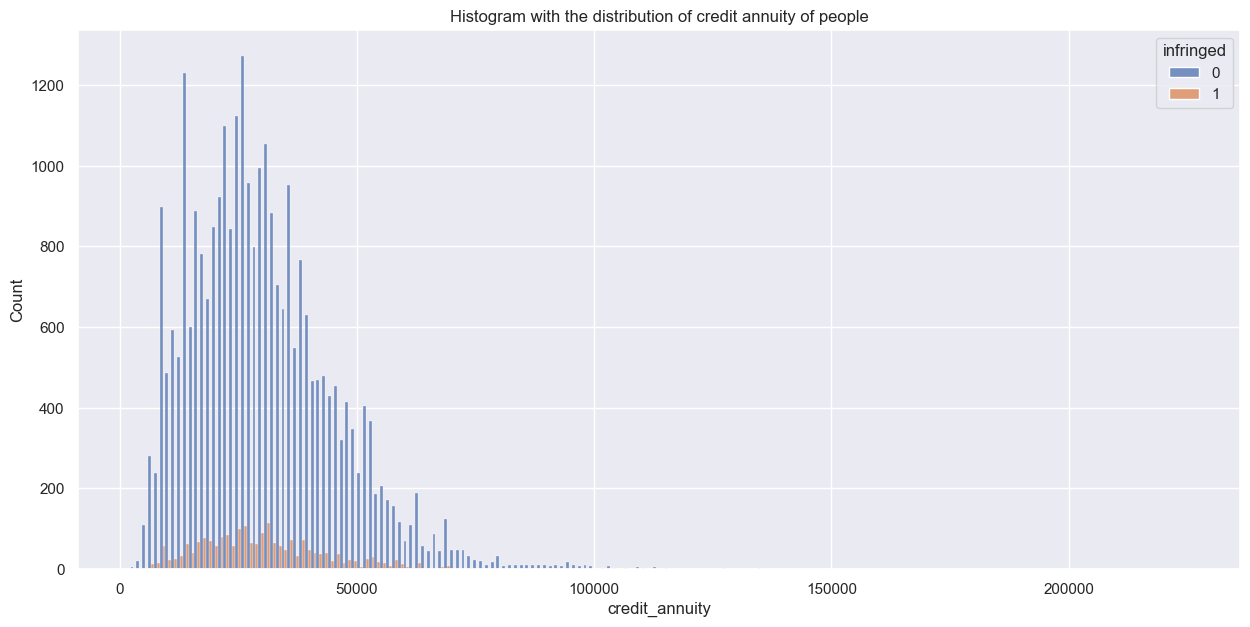

In [49]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='credit_annuity', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of credit annuity of people')

Text(0.5, 1.0, 'Histogram with the distribution of gender of people')

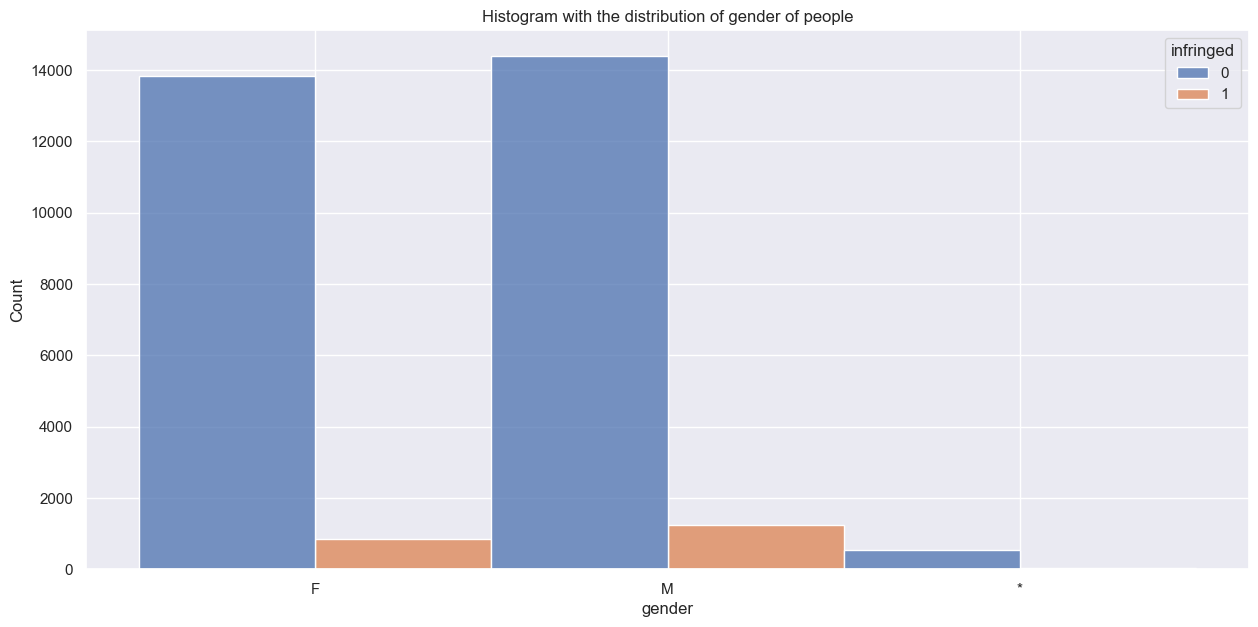

In [43]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='gender', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of gender of people')

À semelhança da distribuição anterior, a distribuição dos géneros é igual à do dataset original.

Text(0.5, 1.0, 'Histogram with the distribution of income type of people')

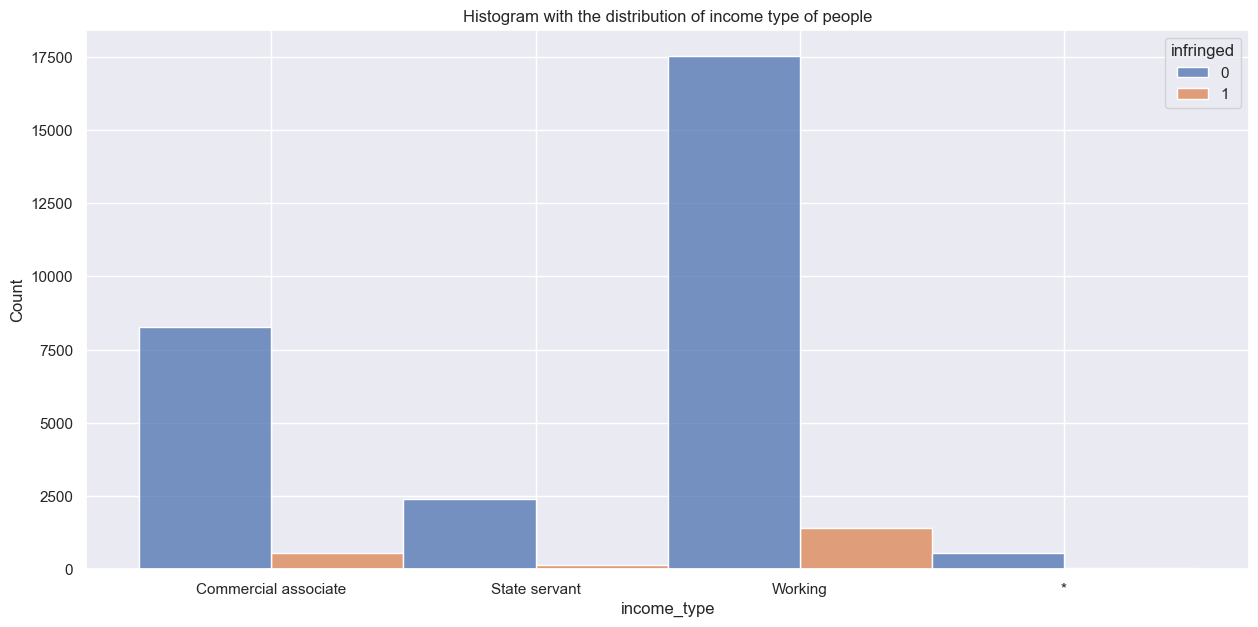

In [44]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='income_type', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of income type of people')

Text(0.5, 1.0, 'Histogram with the distribution of education')

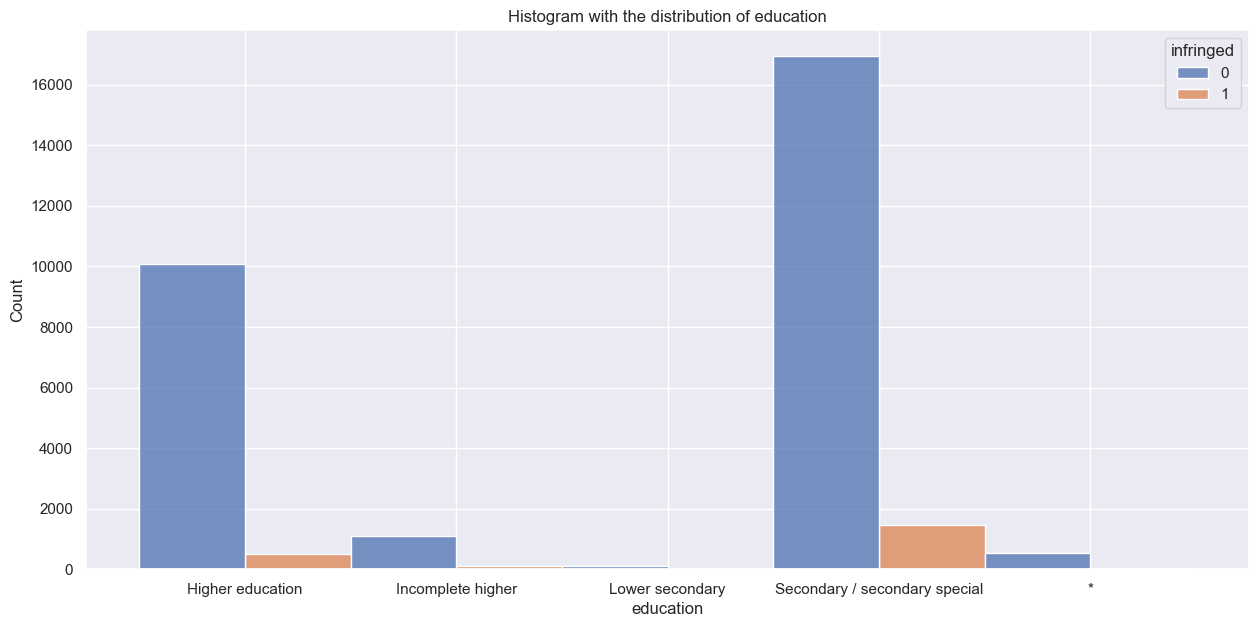

In [45]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='education', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of education')

Text(0.5, 1.0, 'Histogram with the distribution of family staus')

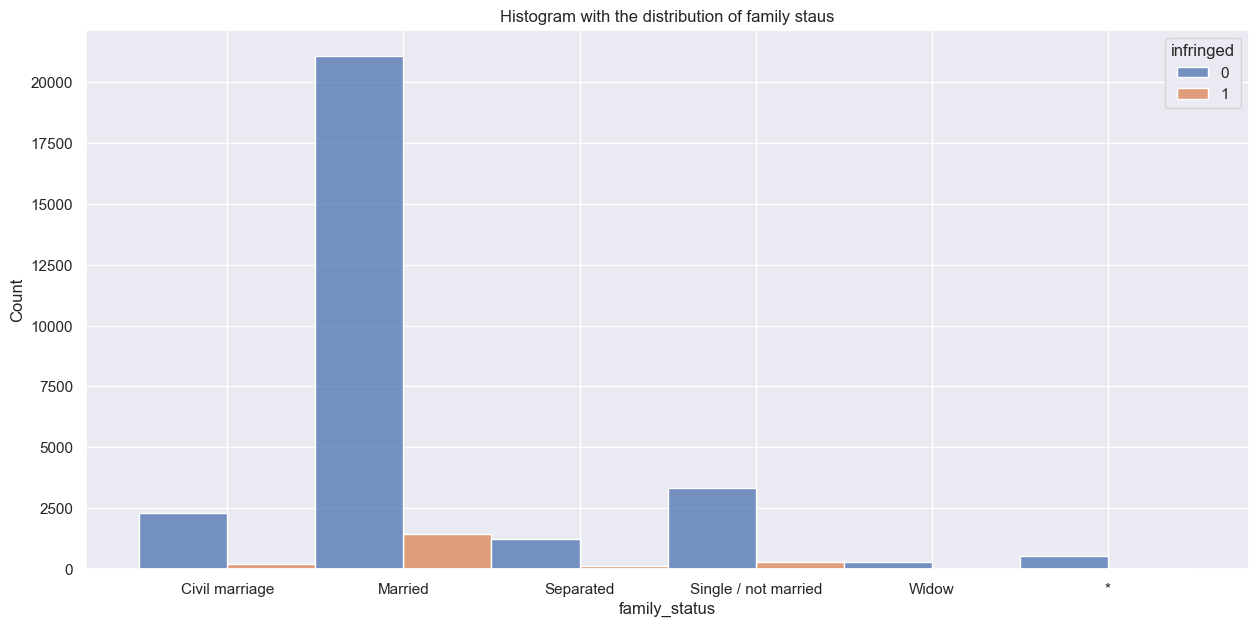

In [46]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='family_status', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of family staus')

Tal como no dataset original, observa-se que são as pessoas casadas que pedem mais empréstimos e que ao mesmo tempo cometem mais infrações nestes.

Text(0.5, 1.0, 'Histogram with the distribution of number of family members')

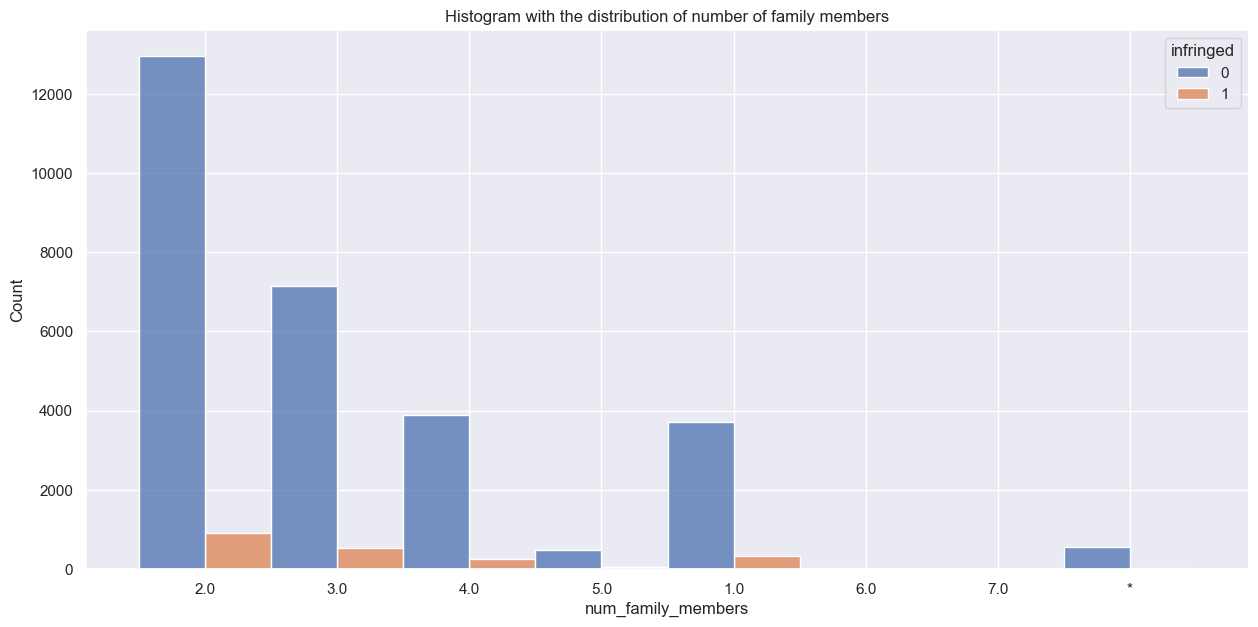

In [47]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='num_family_members', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of number of family members')

Observam-se algumas diferenças para a distribuição do nº de membros na familia para o dataset original, no entanto, as famílias com apenas dois elementos continuama  ser as que petem mais empréstimos e cometem mais infrações. 

O profile da pessoa típica que pede empréstimos mantem-se no novo dataset
 - casad@
 - com dois elementos na sua família (ele/a mais outra pessoa)
 - com apenas educação secundária
 - com idade entre os 20-40 anos
 - trabalhador(a)

Os dados anonimizados com o ARX não divergem muito do dataset original, tendo o benefício de ser difícil distinguir as pessoas que pertencem ao dataset. A maior parte dos dados originais matêm uma vez que muitos dos dados, principalmente da primeira análise são considerados sensíveis, pelo que não foram alterados. Mesmo nos dados que foram alterados, foi mantida uma utilidade alta como se pode comprovar pela análise.